<a href="https://colab.research.google.com/github/thanadolch/KKU_data_mining/blob/master/KMean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6)

In [4]:
X.shape

(300, 2)

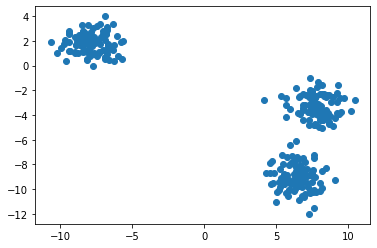

In [5]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.cluster import KMeans

In [13]:
KMcluster = KMeans(n_clusters=5)

In [14]:
KMcluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
label = KMcluster.predict(X)

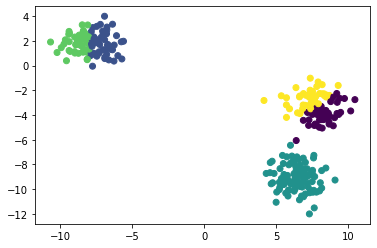

In [16]:
plt.scatter(X[:,0],X[:,1],c=label)

##Color quantization

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
path = '/content/drive/My Drive'

In [21]:
import cv2
import os

In [32]:
img = cv2.imread(os.path.join(path,'83ba3efb63eb0ad83223a2156a567da9.jpg'))
img

array([[[  0,  14,   0],
        [  0,  14,   0],
        [  0,  14,   0],
        ...,
        [ 18,  84,  12],
        [ 18,  84,  12],
        [ 18,  84,  12]],

       [[  0,  14,   0],
        [  0,  14,   0],
        [  0,  14,   0],
        ...,
        [ 18,  84,  12],
        [ 19,  85,  13],
        [ 19,  85,  13]],

       [[  0,  14,   0],
        [  0,  14,   0],
        [  0,  14,   0],
        ...,
        [ 19,  85,  13],
        [ 20,  86,  14],
        [ 20,  86,  14]],

       ...,

       [[ 79,  85, 114],
        [ 83,  89, 118],
        [ 89,  95, 124],
        ...,
        [133, 141, 158],
        [124, 132, 149],
        [134, 141, 158]],

       [[ 53,  60,  87],
        [ 60,  67,  94],
        [ 71,  78, 105],
        ...,
        [135, 142, 159],
        [126, 133, 150],
        [136, 143, 160]],

       [[ 23,  30,  57],
        [ 25,  32,  59],
        [ 29,  36,  63],
        ...,
        [137, 144, 161],
        [128, 135, 152],
        [137, 144, 161]]

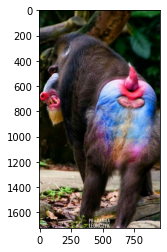

In [33]:
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [34]:
RGB_img.shape

(1724, 959, 3)

Count Unique colors

In [35]:
import numpy as np

In [37]:
np.unique(RGB_img).shape

(256,)

## Use K-mean to reduce color from 256 colors to 8 colors

In [39]:
#Define
myQuantize = KMeans(n_clusters=8)


In [41]:
img_row = np.reshape(RGB_img,(1724*959,3))
img_row

array([[  0,  14,   0],
       [  0,  14,   0],
       [  0,  14,   0],
       ...,
       [161, 144, 137],
       [152, 135, 128],
       [161, 144, 137]], dtype=uint8)

In [42]:
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
res = myQuantize.predict(img_row)

In [44]:
res

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

## Map color name back to image

## Get cluster centers

In [45]:
clus_cen = myQuantize.cluster_centers_
clus_cen

array([[ 48.13229879,  40.47660157,  28.03439597],
       [180.06114025, 137.28637879, 133.53714699],
       [125.25238817,  93.94841779,  90.83298642],
       [ 11.33105701,  15.00015942,   5.31835553],
       [134.06026631, 164.37439074, 216.89807519],
       [214.28203329, 197.45589116, 194.63055302],
       [ 79.33503831,  66.12935681,  60.24067024],
       [ 73.8894672 , 109.82539514, 183.79369901]])

In [47]:
clus_cen.shape

(8, 3)

In [48]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [49]:
new_img = new_img/255

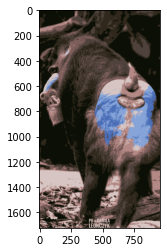

In [50]:
plt.imshow(new_img)